# Lecture 7: Extracting Data Part 1 - Kaggle Integration

## Objective:
This lecture will guide you through the process of signing up on Kaggle, generating an API key, and downloading datasets programmatically using Python.

---

## Step 1: Sign Up for Kaggle
1. Go to [Kaggle's official website](https://www.kaggle.com/).
2. Create a Kaggle account using your email, Google, or other supported options.
3. After signing up, complete your profile setup.

---

## Step 2: Generate Kaggle API Key
1. **Navigate to Your Kaggle Account**:
   - Once logged in, click on your profile icon (top-right corner) and select "Account" from the dropdown menu.
2. **Find the API Section**:
   - Scroll down to the "API" section on the Account page.
3. **Generate the Key**:
   - Click the "Create New API Token" button. This will download a file called `kaggle.json`.

---

## Step 3: Configure the API Key on Windows
1. **Locate Your API Key File**:
   - The downloaded file, `kaggle.json`, contains your Kaggle API credentials.
2. **Place the File in the Appropriate Location**:
   - On Windows: Place it in `C:\Users\<Your Username>\.kaggle\`.
3. **Ensure Proper Permissions**:
   - No additional permission steps are required for Windows.

---

## Step 4: Configure the API Key on Mac OS
1. **Locate and Move the `kaggle.json` File**:
   - Open the **Downloads** folder in Finder (or wherever your browser saves downloaded files).
   - Move the `kaggle.json` file to the hidden `.kaggle` folder in your home directory:
     - Open the **Terminal** and run the following commands:
       ```bash
       mkdir -p ~/.kaggle
       mv ~/Downloads/kaggle.json ~/.kaggle/
       ```

2. **Adjust Permissions for the API Key**:
   - Set the correct file permissions for security:
     ```bash
     chmod 600 ~/.kaggle/kaggle.json
     ```

---

## Step 5: Install Required Libraries
Run the following commands in a code cell or terminal to install the required packages:
```bash
pip install kaggle
pip install kagglehub


In [18]:
import kagglehub

# Download the weather dataset
path = kagglehub.dataset_download("jehanbhathena/weather-dataset")

print("Path to dataset files:", path)

# Example: List the contents of the downloaded dataset
import os
print("Downloaded Files:")
for root, dirs, files in os.walk(path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")


100%|██████████| 587M/587M [02:56<00:00, 3.48MB/s] 

Extracting files...


Path to dataset files: C:\Users\neloya\.cache\kagglehub\datasets\jehanbhathena\weather-dataset\versions\3
Downloaded Files:
Root: C:\Users\neloya\.cache\kagglehub\datasets\jehanbhathena\weather-dataset\versions\3
Directories: ['dataset']
Files: []
Root: C:\Users\neloya\.cache\kagglehub\datasets\jehanbhathena\weather-dataset\versions\3\dataset
Directories: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
Files: []
Root: C:\Users\neloya\.cache\kagglehub\datasets\jehanbhathena\weather-dataset\versions\3\dataset\dew
Directories: []
Files: ['2208.jpg', '2209.jpg', '2210.jpg', '2211.jpg', '2212.jpg', '2213.jpg', '2214.jpg', '2215.jpg', '2216.jpg', '2217.jpg', '2218.jpg', '2219.jpg', '2220.jpg', '2221.jpg', '2222.jpg', '2223.jpg', '2224.jpg', '2225.jpg', '2226.jpg', '2227.jpg', '2228.jpg', '2229.jpg', '2230.jpg', '2231.jpg', '2232.jpg', '2233.jpg', '2234.jpg', '2235.jpg', '2236.jpg', '2237.jpg', '2238.jpg', '2239.jpg', '2240.jpg', '2241

                                           File_Path   Labels
0  C:\Users\neloya\.cache\kagglehub\datasets\jeha...     rime
1  C:\Users\neloya\.cache\kagglehub\datasets\jeha...     hail
2  C:\Users\neloya\.cache\kagglehub\datasets\jeha...  fogsmog
3  C:\Users\neloya\.cache\kagglehub\datasets\jeha...    glaze
4  C:\Users\neloya\.cache\kagglehub\datasets\jeha...     rain


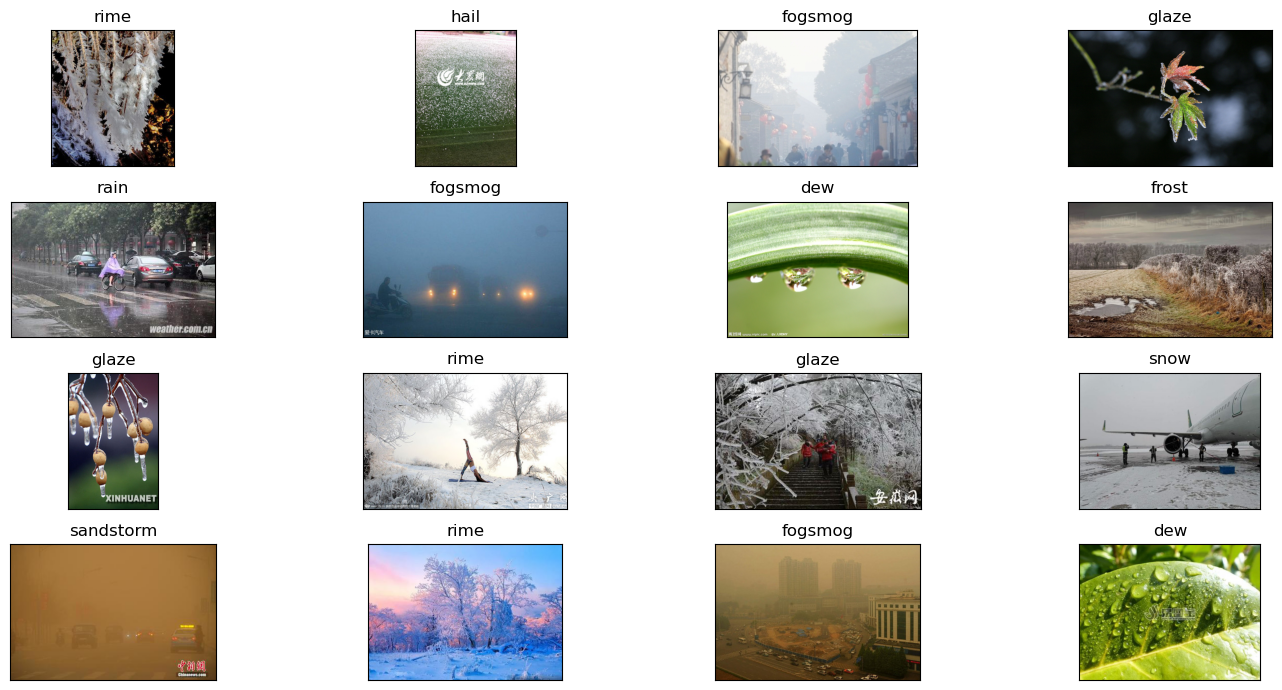

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base directory
base_dir = r"C:\Users\neloya\.cache\kagglehub\datasets\jehanbhathena\weather-dataset\versions\3\dataset"

# Gather all image paths and their labels
path_imgs = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
            path_imgs.append(os.path.join(root, file))

# Extract labels from the folder names
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], path_imgs))

# Create a DataFrame with file paths and labels
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset

# Display the first few rows of the DataFrame
print(data.head())

# Visualize a grid of sample images with their labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    if i < len(data):  # Ensure we don't go out of range
        img = plt.imread(data.File_Path[i])
        ax.imshow(img)
        ax.set_title(data.Labels[i])
plt.tight_layout()
plt.show()


In [22]:
# Display dataset info
print("Dataset Info:")
print(data.info())

# Count unique labels (weather types)
print("\nUnique Labels and Counts:")
print(data['Labels'].value_counts())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6862 entries, 0 to 6861
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File_Path  6862 non-null   object
 1   Labels     6862 non-null   object
dtypes: object(2)
memory usage: 107.3+ KB
None

Unique Labels and Counts:
Labels
rime         1160
fogsmog       851
dew           698
sandstorm     692
glaze         639
snow          621
hail          591
rain          526
frost         475
lightning     377
rainbow       232
Name: count, dtype: int64

Missing Values:
File_Path    0
Labels       0
dtype: int64


C:\Users\neloya\AppData\Local\Temp\ipykernel_23368\978219219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Labels'], order=data['Labels'].value_counts().index, palette="viridis")


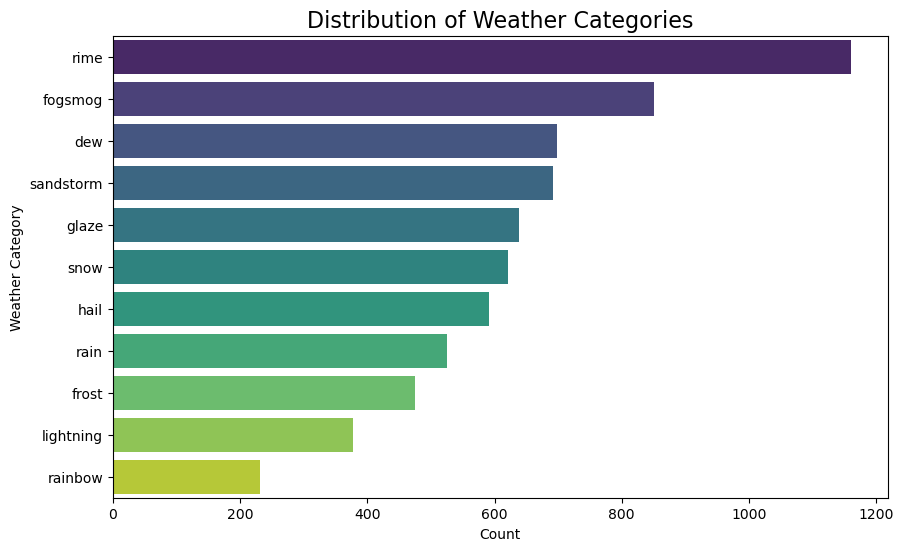

In [24]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y=data['Labels'], order=data['Labels'].value_counts().index, palette="viridis")
plt.title("Distribution of Weather Categories", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Weather Category")
plt.show()


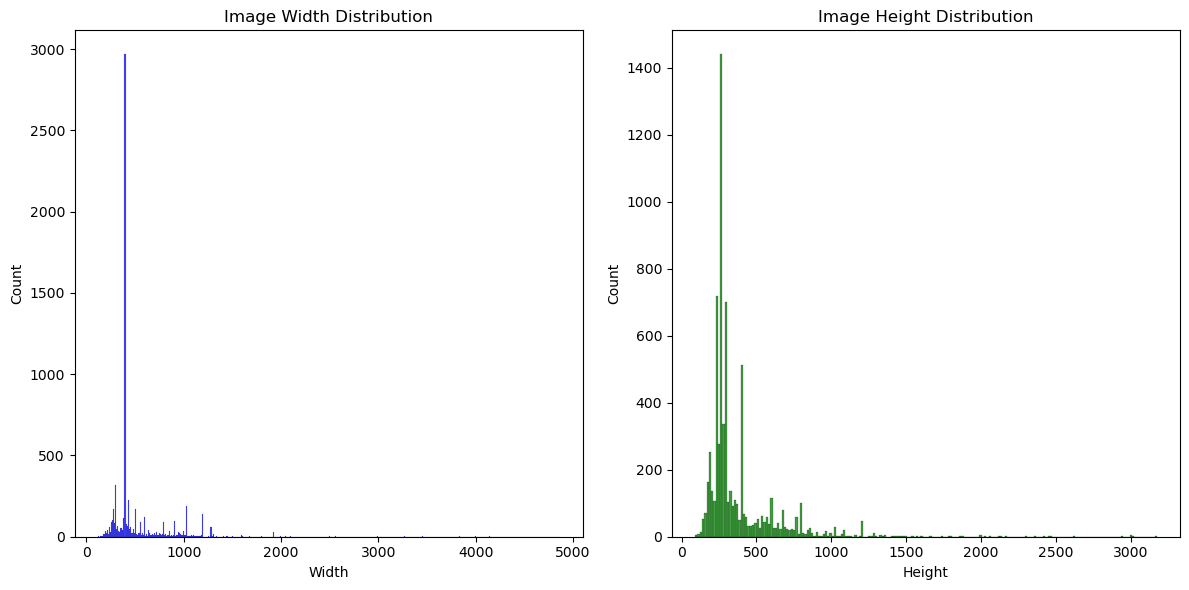

In [26]:
from PIL import Image

# Get image dimensions
image_shapes = [Image.open(file).size for file in data['File_Path']]
widths, heights = zip(*image_shapes)

# Plot width and height distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(widths, kde=False, color="blue")
plt.title("Image Width Distribution")
plt.xlabel("Width")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(heights, kde=False, color="green")
plt.title("Image Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


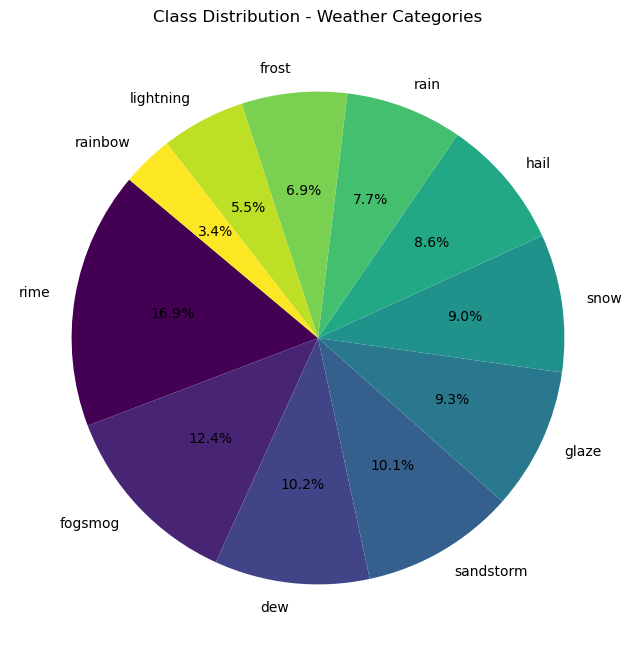

In [28]:
# Plot pie chart
plt.figure(figsize=(8, 8))
data['Labels'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title("Class Distribution - Weather Categories")
plt.ylabel("")
plt.show()


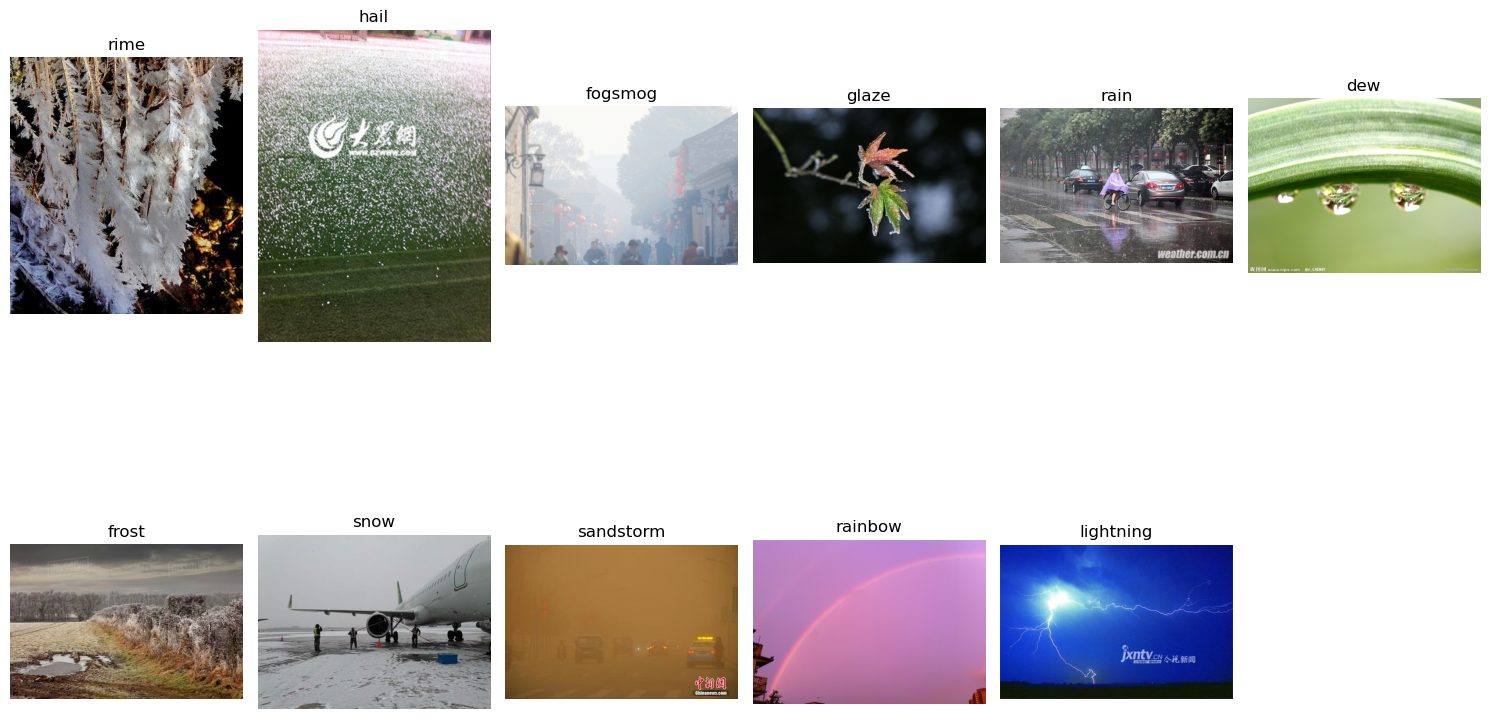

In [30]:
unique_labels = data['Labels'].unique()

plt.figure(figsize=(15, 10))

for i, label in enumerate(unique_labels):
    sample = data[data['Labels'] == label].iloc[0]
    img = plt.imread(sample['File_Path'])
    
    plt.subplot(2, len(unique_labels)//2 + 1, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()


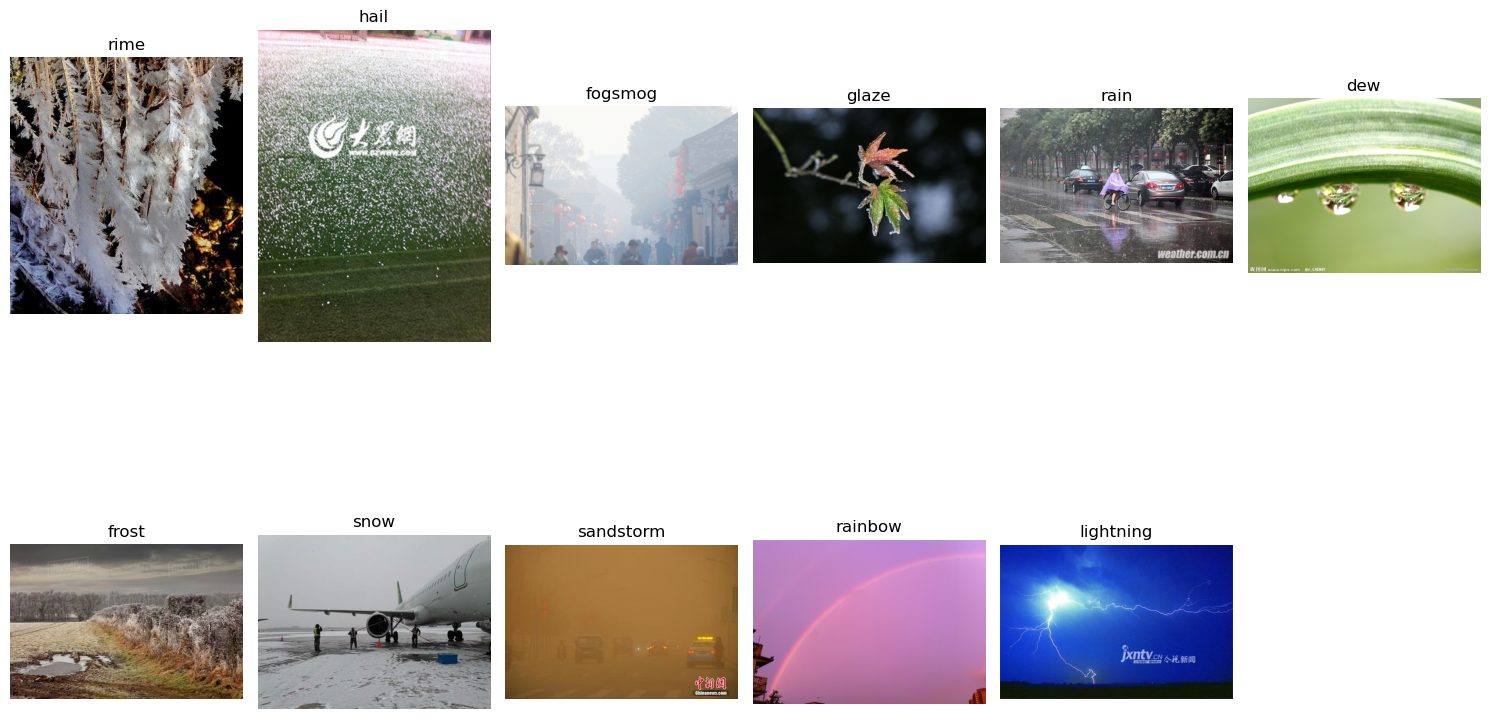

In [32]:
unique_labels = data['Labels'].unique()

plt.figure(figsize=(15, 10))

for i, label in enumerate(unique_labels):
    sample = data[data['Labels'] == label].iloc[0]
    img = plt.imread(sample['File_Path'])
    
    plt.subplot(2, len(unique_labels)//2 + 1, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()


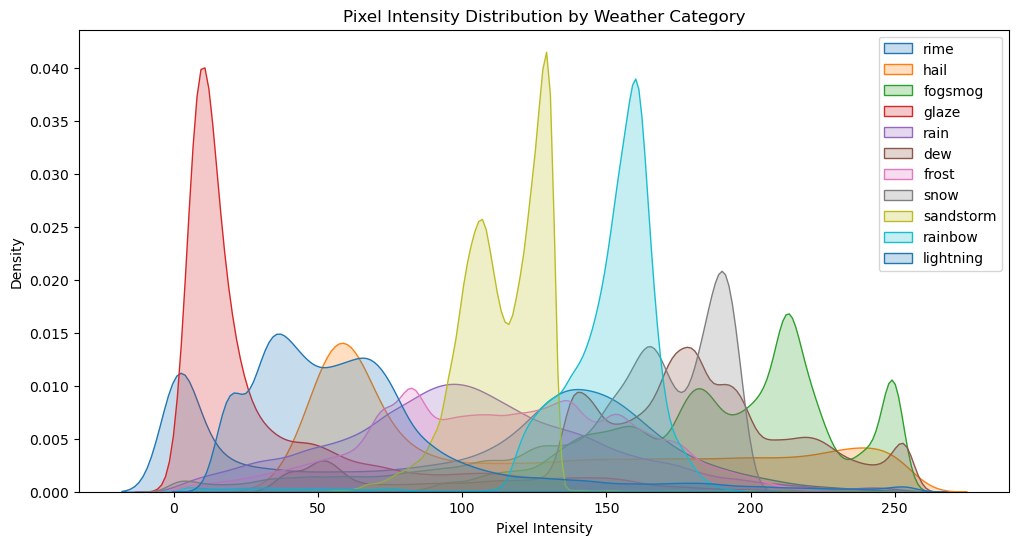

In [36]:
import numpy as np

# Sample pixel intensity distributions
plt.figure(figsize=(12, 6))
for label in unique_labels:
    sample_path = data[data['Labels'] == label]['File_Path'].iloc[0]
    img = Image.open(sample_path).convert('L')  # Convert to grayscale
    img_array = np.array(img).flatten()
    sns.kdeplot(img_array, label=label, fill=True)

plt.title("Pixel Intensity Distribution by Weather Category")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")
plt.legend()
plt.show()


In [38]:
from torchvision.transforms import Compose, Resize, ToTensor

# Define transformation for resizing images
resize_transform = Compose([Resize((128, 128)), ToTensor()])

# Apply transformation to all images
data['Resized_Images'] = data['File_Path'].apply(
    lambda x: resize_transform(Image.open(x).convert('RGB'))
)

# Check the shape of a resized image
print(f"Shape of Resized Image: {data['Resized_Images'].iloc[0].shape}")


Shape of Resized Image: torch.Size([3, 128, 128])


## Next Steps
- **Modeling**: Use this preprocessed data to train classification models (e.g., CNNs, ResNet).
- **Augmentation**: Apply image augmentations (e.g., flips, rotations) to improve model generalization

# In-Class Activity: EuroSAT Dataset Exploration

## Objective:
In this activity, you will apply the skills learned in **Lecture 7** to download and perform exploratory data analysis (EDA) on a new dataset, the **EuroSAT Dataset**. This activity will reinforce your ability to work with Kaggle datasets programmatically and analyze them effectively.

---

## Instructions:

### Step 1: Download the Dataset
1. Ensure you have followed the Kaggle API setup steps from **Lecture 7**.
2. Run the following code in a code cell to download the **EuroSAT Dataset**:
3. Download latest version -
   ```
   apollo2506/eurosat-dataset
   ```
4. Once downloaded, verify that the dataset is saved and extracted properly in the printed path.
5. Step 2: Perform EDA on the Dataset
6. Submit the notebook - "Week 4 submission"